In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ratings = pd.read_csv("Data/title_ratings_cleaned.gz", index_col = False, usecols = ["tconst", "averageRating"])
year = pd.read_csv("Data/title_basics_for_ratings_analysis.gz", index_col = False, usecols = ["tconst", "startYear"])
year = year.rename(columns={"startYear" : "year"})

In [3]:
merged = pd.merge(ratings, year, on = "tconst")
merged = merged.dropna()
merged = merged.reset_index(drop=True)
merged

,tconst,averageRating,year
0,tt0000009,5.9,1894.0
1,tt0000147,5.2,1897.0
2,tt0000335,6.1,1900.0
3,tt0000502,3.8,1905.0
4,tt0000574,6.1,1906.0
...,...,...,...
251317,tt9915790,7.3,2019.0
251318,tt9916132,3.6,2018.0
251319,tt9916160,6.6,2019.0
251320,tt9916428,4.1,2019.0


In [4]:
fit = stats.linregress(merged["year"], merged["averageRating"])
merged["prediction"] = fit.intercept + (fit.slope * merged.year)
print(fit)

LinregressResult(slope=0.0013511882212446922, intercept=3.4588739338169963, rvalue=0.026020420394369352, pvalue=6.635333124087848e-39, stderr=0.00010354781623105437)


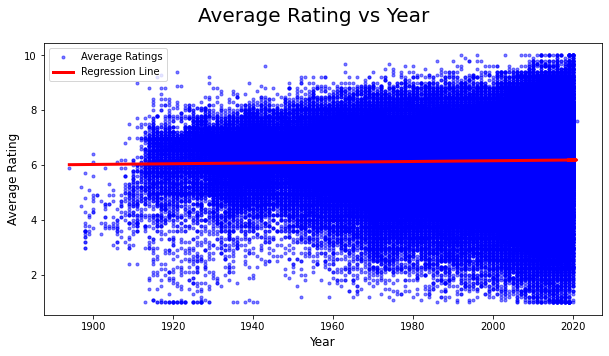

In [5]:
plt.figure(figsize=(10,5))
plt.plot(merged["year"], merged["averageRating"], "b.", alpha=0.5)
plt.plot(merged["year"], merged["prediction"], "r-", linewidth=3)

plt.suptitle("Average Rating vs Year", fontsize=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.legend(['Average Ratings', 'Regression Line'])

plt.show()

Text(0.5, 1.0, 'Histogram of Residuals')

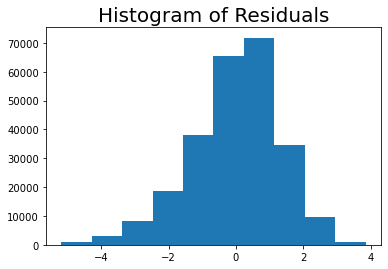

In [6]:
residuals = merged["averageRating"] - (fit.intercept + (fit.slope * merged["year"]))
plt.hist(residuals)
plt.title('Histogram of Residuals', fontsize=20)

In [7]:
print(fit.rvalue**2)

0.0006770622774997125
